# Time-Series Data: Importing, cleaning, and visualizing our data

Now that we have the basics out of the way we can get started on the good stuff. There are plenty of great tutorials out there that will go through a much more traditional approach in teaching Python, but I think the best way to start out learning a programming language is to get thrown into the deep end (although I might be biased because that is how I learned). 

A pretty ubiquitous type of data across all fields is time-series data. Usually in the form of some structured datatable. In this case, we will be using a radio observation of a Ultra-Cool M-dwarf made from the Karl Jansky Very Large Telescope (VLT) Array. This observation is from a project I worked on and it is publically availbe via the National Radio Astronomy Observatory's (NRAO) database. 


## Importing and exploring the data table

Let us begin by importing the appropriate libraries


In [2]:
import pandas as pd # This will handle our data table
import matplotlib.pyplot as plt # This will create the plots
import numpy as np # For any type of data manipulation

Pandas is a powerful module when it comes to data tables and data manipulations. If your data is structured nicely, it will be able to read in the table easily. Unstructured data tables are a little more tricky, but not impossible. Since we are just starting out, I structured our data nicely so that we do not have to worry about that (yet).

Because our data is nicely structured, we can impliment pandas **read_table** function. All we need to do is give the path to where our data is stored and Python will do all the work in finding out the what the delimiter is for the data table. Lets import our data and give it a look.

Note: Before someone says it, I know I did not use the print function. Jupyter does a good job at making data table outputs look nice and fancy.

In [19]:
dt = pd.read_table('data/2M1314_stokesI.dat') # imports the data

print(dt.head(),'\n') # Shows the first five rows of the data table


print('Print the columns names \n')
print('-----------------------')
print(dt.columns) # prints the column names

            mjd     dtmin        re       ure        im       uim       abs  \
0  57771.517664  0.000000  1.533996  0.179943  0.072631  0.183728  1.535714   
1  57771.517687  0.033333  1.923687  0.149330 -0.037306  0.150152  1.924048   
2  57771.517710  0.066667  1.926674  0.149245 -0.320150  0.150363  1.953092   
3  57771.517734  0.100000  2.139733  0.150264 -0.036050  0.150002  2.140037   
4  57771.517757  0.133333  2.021067  0.149928  0.030501  0.149241  2.021297   

       uabs  nsamp  
0  0.179952   6930  
1  0.149331   9850  
2  0.149275   9850  
3  0.150263   9850  
4  0.149928   9850   

Print the columns names 

-----------------------
Index(['mjd', 'dtmin', 're', 'ure', 'im', 'uim', 'abs', 'uabs', 'nsamp'], dtype='object')


We can see at the top of our table are the columns names. MJD is Modified Julian Dates which is a system used by astronomers to keep track of time, dtmin short for 'data table mintues' which times the start and stop of the observations in units of minutes. 're', 'ure', 'im', and 'uim' are measurements of the radio signal broken up between real ('re') and imaginary ('im') with their respective uncertainties ('ure','uim'). 'Abs' is the absolute measurement (combining real and imaginary parts). 'nsamp' is a metric of how good the overall signal in the VLA. 

So our smallest sample size here is (2 seconds)

We can also perform some simple calculations to get an idea of the data

In [25]:
print('The average (real) flux value in mJy: ', dt['re'].mean())
print('Highest and lowest (real) flux values in mJy: ', dt['re'].max(),dt['re'].min())

The average (real) flux value in mJy:  1.6110739766802589
Highest and lowest (real) flux values in mJy:  2.391120844157506 -0.3204849176448797


## Cleaning our dataset

Now that we have our raw* data, we can begin prepping our data table so that we can maximize our workflow. The first thing we want to do is remove any unnecessary columns that we won't be using. The data is split into **real** and **imaginary** measurements due to the nature of the observations (if you are interested, feel free to research very long baseline interferometry) but we only want to work with the real portion of the data. So we will remove the imaginary, uncertainties of the imaginary, and the absolute data measurements. This process is very simple in Pandas

In [10]:
dt = dt.drop(columns=['im','ure','abs','uabs']) # Will drop columns
dt.head()

,mjd,dtmin,re,uim,nsamp
0,57771.517664,0.000000,1.533996,0.183728,6930
1,57771.517687,0.033333,1.923687,0.150152,9850
2,57771.517710,0.066667,1.926674,0.150363,9850
3,57771.517734,0.100000,2.139733,0.150002,9850
4,57771.517757,0.133333,2.021067,0.149241,9850


Perfect, now that we dropped the unncessary columns, we can now focus on the column nsamp. As I mentioned above, nsamp is a metric on how good our signal was per timestamp (it is a little more involved than just that, but the techincal background is beyond the scope of the tutorial). As you can tell from just the first row, nsamp is siginificantly lower than the following 4 rows. Let us clean this by making sure nsamp is at least 8000.

In [29]:
dt = dt[dt['nsamp']>8000]
dt.head()

,mjd,dtmin,re,ure,im,uim,abs,uabs,nsamp
1,57771.517687,0.033333,1.923687,0.149330,-0.037306,0.150152,1.924048,0.149331,9850
2,57771.517710,0.066667,1.926674,0.149245,-0.320150,0.150363,1.953092,0.149275,9850
3,57771.517734,0.100000,2.139733,0.150264,-0.036050,0.150002,2.140037,0.150263,9850
4,57771.517757,0.133333,2.021067,0.149928,0.030501,0.149241,2.021297,0.149928,9850
5,57771.517780,0.166667,1.676629,0.150749,-0.154845,0.149779,1.683764,0.150741,9850


Let me dissect that bit of code. Starting with the inner portion:

* dt['nsamp']>8000 -> This portion grabs all the rows that have nsamp more than 8000 
* dt[dt['nsamp']>8000,reindex=] -> From those rows, this grabs all the columns 

We can see from the first 5 rows that the first line that had only 6930 nsamps is now gone. 

## Visualizing the data

Now that we imported and cleaned our data, let us finally create a plot of our data.

There are two ways of doing this:
1. Using Panda
2. Using matplotlib 

Panda techincally uses matplotlib in its plotting functions, but I personally like going straight to matplotlib since it gives me more control and ends up becoming much cleaner. I will use matplotlib since I'll be focusing mainly on that in future tutorials.

There is a method to creating a plot using matplotlib that takes a little getting use to it but after you do it a few times it will begin to make sense. I'll try to outline the process:

1. Create a figure
    * This tells your computer to make an actual blank figure. Think of this as pulling out a piece of paper that you are going to draw on
2. Add data
    * This is where you begin specifying what kind of plot you are making (scatter, continuous line) along with any type of customizations (marker, color, labels)
3. Add axis labels and other miscellanous changes
    * At this step, you start customizing exactly how you want your plot to look: where do you want the ticks markers, x and y axis limits, their labels, etc.
4. Show (and possibly save) the figure

Although I summed it up in only four steps, anyone with experience with matplotlib knows that it you can spend up to a week trying to get plots to look exactly how you want. 

### Note

Remember when putting inputs for functions that you can either use their variable name or their location within the call function. For example plt.errorbar, which we'll use below, has the variables defined as such:

>errorbar(x, y, yerr=None, xerr=None, fmt='', ecolor=None, elinewidth=None, capsize=None, barsabove=False, lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=None)

So if you put your **y_data** first in the fuction (errorbar(y_data,x_data)) then the axes will actually be opposite of what you want.

If you are unsure what a particular function takes as the input, you can always use **?** or do a quick google search. 

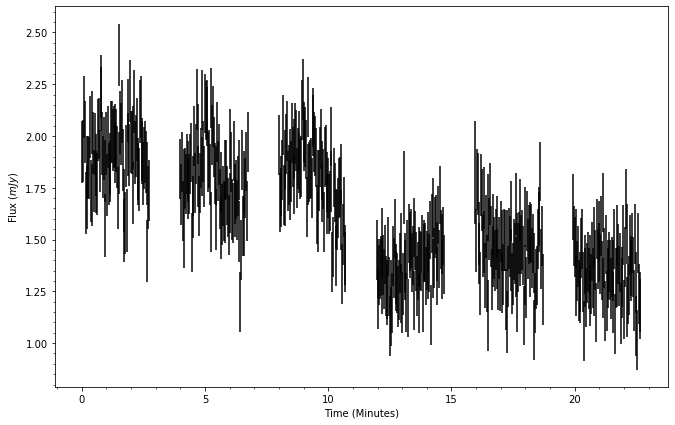

In [33]:
'''
Creating a blank figure
'''
plt.figure(figsize=(11,7))

'''
Adding the data
'''
plt.errorbar(dt['dtmin'],dt['re'],yerr=dt['ure'],fmt='k',linestyle='None') 

'''
Other plot customizations
'''
plt.ylabel('Flux ($mJy$)') # Jupyter supports LaTex notation
plt.xlabel('Time (Minutes)')
plt.minorticks_on()
plt.show()

Viola! A plot of the data should have show up. This example is really just the very tip of the iceberg. Matplotlib is a **very** powerful data visualization library, but there is so much to it that it does take some (alot) of time to get a good grasp at it. 



# Binning Time-Series Data

Looking at the plot above, we can start to get an idea of the 